# Homework 1
## Econ 1680: MLTA and Econ

#### Name: Nadya Tan

In this course we will be using Python for writing code to apply machine learning and text analysis methods to economics topics. Python is free, flexible, offers a variety of predefined packages, and is popular. It can handle everything from the statistical analysis of Stata to the matrix algebra and simulation of Matlab.

This assignment is meant to introduce you to how we will be using Python in this course. For this assignment, you should write/type your answers into this worksheet. You may discuss the problem set with your class mates, but every student must do their own work. 

It is always important to cite our references that help us in our work. Please list the students you work with here:

1\. Issac Yi

2\.

3\.


## I. PRELIMINARIES 

Preliminaries are listed in the HW1 Assignment on Canvas. It includes the following:

* Downloading and installing Python/Anaconda

* Installing necessary pacakges for the homework assignment

* Setting up your GitHub account for keeping track of your work

* How to sumbit your homework assignment and code 

In [1]:
! pip install nasdaq-data-link
! pip install notebook

   ---------------------------------------- 11.6/11.6 MB 319.7 kB/s eta 0:00:00
   ---------------------------------------- 62.6/62.6 kB 670.9 kB/s eta 0:00:00
   ---------------------------------------- 57.0/57.0 kB 1.5 MB/s eta 0:00:00
   -------------------------------------- 162.5/162.5 kB 212.1 kB/s eta 0:00:00
   --------------------------------------- 100.4/100.4 kB 96.2 kB/s eta 0:00:00
   ---------------------------------------- 61.6/61.6 kB 466.6 kB/s eta 0:00:00
   -------------------------------------- 506.5/506.5 kB 324.2 kB/s eta 0:00:00
   -------------------------------------- 346.6/346.6 kB 247.5 kB/s eta 0:00:00
   -------------------------------------- 120.9/120.9 kB 784.7 kB/s eta 0:00:00
     ------------------------------------ 133.5/133.5 kB 986.0 kB/s eta 0:00:00
     ------------------------------------ 118.7/118.7 kB 867.7 kB/s eta 0:00:00
   ---------------------------------------- 4.0/4.0 MB 154.1 kB/s eta 0:00:00
   -------------------------------------- 38

## II.	NUMERICAL DATA 

### 1. Zillow Data

Access Zillow Real Estate Data using the Nasdaq Data Link API. Nasdaq Data Link is a dataset aggregation website that also has other economics datasets. These types of websites can make it easier to get data and to explore what types of datasets are available. 
    
- Set up free account with Nasdaq Data Link (https://data.nasdaq.com/). Find your API Key in your Account Settings. You will need this to download the data.

- Find the “Zillow Real Estate Data” that is Free (https://data.nasdaq.com/databases/ZILLOW/data) This will be the data you will download.

- Click on the “Usage” tab, then select the “Python” sub-tab for instructions on using the Nasdaq Data Link API.

- To decide which variables and regions we want to download data for, we will first download information on the indicators and regions. In a python environment, you will run the code above to import packages, setup your API connection, and download the indicator and region dataframes:

In [2]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Change the API key to yours
nasdaqdatalink.ApiConfig.api_key = 'sj1daUN-Ski1YGCsC9pL'
df_zillow_indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS', paginate=True)
df_zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS', paginate=True)

#### 1a. What does ZHVI in the indicator descriptions stand for? 

Answer: Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. 


#### 1b. What is the indicator, description, and category of row 38 in df_zillow_indicators? 

Hint: use `.iloc[]` 

Answer: Indicator ID - LRAW, Indicator - Median List Price (Raw, All Homes, Weekly View), Category - Inventory and Sales 

In [3]:
# Write the code you need (if any) to answer the questions above
df_zillow_regions.head()
df_zillow_indicators.head()

df_zillow_indicators.iloc[38]


indicator_id                                               LRAW
indicator       Median List Price (Raw, All Homes, Weekly View)
category                                    Inventory and sales
Name: 38, dtype: object

#### 1c. In df_zillow_regions, how many regions are there when you search for “Providence;RI”? What is the region_id number for Providence, RI? 

Hint: use `.str.contains('Providence;RI')` 

Answer: 4 regions. The region_id number for Providence;RI is 26637

In [9]:
# Write the code you need (if any) to answer the questions above
df_zillow_regions_pvd = df_zillow_regions[df_zillow_regions['region'].str.contains('Providence;RI')]


In [13]:
df_zillow_regions_pvd.head()


,region_id,region_type,region
None,,,
52365,4488,city,"East Providence;RI;Providence-Warwick, RI-MA;P..."
57533,40069,city,"North Providence;RI;Providence-Warwick, RI-MA;..."
72116,271242,neigh,"Lower South Providence;RI;Providence-Warwick, ..."
74508,26637,city,"Providence;RI;Providence-Warwick, RI-MA;Provid..."


In [14]:
df_zillow_regions_pvd.shape


(4, 3)

#### 1d. Download a dataframe the city of Providence, RI on ZHVI Single-Family Home values with the correct indicator and region IDs entered using the following line:

In [4]:
df_zillow_sfh = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZSFH' , region_id='26637',paginate=True)


### 2. Descriptive statistics 

#### 2a. What is the data frequency in df_zillow_sfh? 
Answer: the data is collected every month (at the end of each month)



#### 2b. What is the median dollar value of a home in df_zillow_sfh? 

Answer: 162415


In [7]:
# Write the code you need (if any) to answer the questions above
df_zillow_sfh['value'].median()

162415.478015742

#### 2c. What is the median dollar value of a home in df_zillow_sfh for the year of 2020? 

Hint: use  `[df_zillow_sfh['date'].dt.year==2020]`
Answer: 253457

In [9]:
# Write the code you need (if any) to answer the questions above
df_zillow_sfh[df_zillow_sfh['date'].dt.year==2020]['value'].median()

253457.2623749855

### 3. Visualize the Data

#### 3a. Plot a time series graph for values df_zillow_sfh. Be sure to title your graph and label your axes. 

Text(0, 0.5, 'Monthly Average Dollar Value')

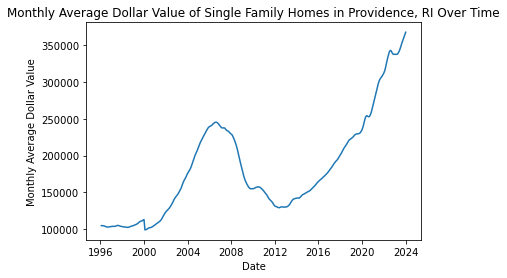

In [23]:
# Write the code you need (if any) to answer the questions above:
plt.plot(df_zillow_sfh['date'], df_zillow_sfh['value'])
plt.title('Monthly Average Dollar Value of Single Family Homes in Providence, RI Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Average Dollar Value')


#### 3b. Plot time series graph for *yearly median* values df_zillow_sfh. Be sure to title your graph and label your axes. 

Hint: you will can create a new dataframe by creating a ‘year’ column using .dt.year and then use `.groupby(by=['year']).median(numeric_only=True)` to make a yearly dataframe. 

Text(0, 0.5, 'Yearly Median Dollar Value ')

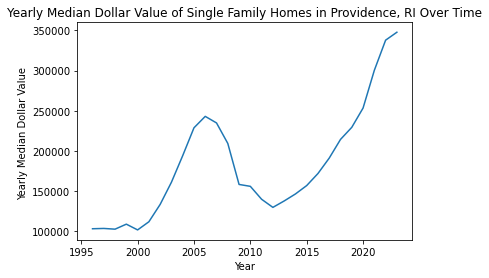

In [22]:
# Write the code you need (if any) to answer the questions above:
df_zillow_sfh['year'] = df_zillow_sfh['date'].dt.year
df_zillow_sfh_by_year = df_zillow_sfh.groupby(by=['year']).median(numeric_only=True)
df_zillow_sfh_by_year.head()
plt.plot(df_zillow_sfh_by_year.index, df_zillow_sfh_by_year['value'])
plt.title('Yearly Median Dollar Value of Single Family Homes in Providence, RI Over Time')
plt.xlabel('Year')
plt.ylabel('Yearly Median Dollar Value ')
 


#### 3c. What looks different in these graphs? Why?

Answer: The second graph is smoother since there are less data points that connect the lines (which results in the monthly graph being more jagged)


#### 3d. Describe the patterns in the graph. What does it say about the housing market in Providence, RI over time? In recent years? What additional data would you need to make claims about what is changing this price? 

Answer: It shows that the price of single family housing in Providence has fluctuated over time, and has been steadily increasing in recent years. To find out what could be driving the increase in price, it would be helpful to look at how the population has changed in recent years and how the availability of such housing units has changed as well. 


## III	TEXT DATA 

### 4. US News Data
Download US Economic News Dataset from Kaggle.com: Sign up for a free account with Kaggle.com. This website hosts data science competitions and often has cool datasets available for download. We will be using the US Economic News Dataset at https://www.kaggle.com/heeraldedhia/us-economic-news-articles. Download the CSV file from the website by clicking “Download.”
     
Load a subset of the data into Jupyter/Spyder/Python: Sometimes you may be working with a large dataset and it is therefore important to understand how to load a subset of the data at a time. The US Economic News dataset has 8,000 observations.

#### 4a. Run the code below and explain in words each of the lines of code with comments (use # to comment): 

In [26]:
import os
import csv

# Define the folder path where the data is located
folder_path = 'C:/Users/Nadya/IdeaProjects/ECON1680/ECON1620-Spring2024'

# Open the original CSV file for reading
fileReader = open(os.path.join(folder_path, "US-Economic-News.csv"), "r", encoding="unicode_escape")
csvReader = csv.reader(fileReader)

# Open a new CSV file for writing, to store a subset of data
fileWriter = open(os.path.join(folder_path, "Subset_US_Economic_News.csv"), "w", encoding="unicode_escape", newline='')
csvWriter = csv.writer(fileWriter)

# Read and write the first row of the CSV file
acHeader = next(csvReader)  
csvWriter.writerow(acHeader) 

# Iterate through the rows in the original CSV file, writing a subset of the data to the new CSV file
for index, acRow in enumerate(csvReader):
    if index < 800:  
        csvWriter.writerow(acRow)

# Close the file readers and writers
fileReader.close()
fileWriter.close()

# Read the subset CSV file into a pandas DataFrame and convert the 'date' column to datetime format
df_news = pd.read_csv(os.path.join(folder_path, "Subset_US_Economic_News.csv"), encoding='unicode_escape')
df_news['date'] = pd.to_datetime(df_news['date'])


C:\Users\Nadya\AppData\Local\Temp\ipykernel_7500\1864366414.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_news['date'] = pd.to_datetime(df_news['date'])


#### 4b.  What code would you write to keep only the ‘date’, ‘headline’, and ‘text’ columns in the dataframe? Write and run that code: 

In [32]:
# Write the code you need (if any) for b.:
df_news = df_news[['date', 'headline', 'text']]


In [33]:
df_news.head()

,date,headline,text
0,1991-08-14,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,2007-08-21,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,1991-11-14,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,1986-06-16,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,2002-10-04,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


### 5. String Extraction

This dataframe is full of text data about US Economic News. When we try to extract information from text, formatting of words and string in code is very important.

#### 5a. Count the number of headlines that have ‘US’ in them. 

Hint: loop over `df_news[‘headlines’]`. 

Answer: 1


In [34]:
# Write the code you need (if any) to answer the question above

us_headlines_count = 0
for headline in df_news['headline']:
    if 'US' in headline:
        us_headlines_count += 1
print(us_headlines_count)


1


#### 5b. Count the number of headlines that have ‘us’ in them.

Answer: 143


In [35]:
# Write the code you need (if any) to answer the question above
us_headlines_count = 0
for headline in df_news['headline']:
    if 'us' in headline:
        us_headlines_count += 1
print(us_headlines_count)

143


#### 5c. Why are these counts different? 

Hint: tell python to check if ‘us’ is in the string ‘trust’. Then tell python to check if ‘ us ‘ is in the string ‘trust’. 

Answer: Python is case sensitive 


In [31]:
if 'us' in 'trust':
    print("'us' is present in 'trust'")
else:
    print("'us' is not present in 'trust'")


if ' US ' in 'trust':
    print("' US ' is present in 'trust'")
else:
    print("' US ' is not present in 'trust'")


'us' is present in 'trust'
' US ' is not present in 'trust'


### 6. Annotate Text Processing Code

In text analysis, we will need to perform a few tasks to clean the data to prepare it for consistent analysis. 

#### 6a. Run the code and explain what each line does as comments (use # to comment): 

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


# Load English stopwords
stops = set(stopwords.words('english'))

# Define a translation table to remove punctuation
table_punctuation = str.maketrans('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') 

# Tokenize and preprocess text
token_list = []
for i, row in enumerate(df_news['text']):
    text = row.translate(table_punctuation)
    tokens = [word.lower() for word in nltk.tokenize.word_tokenize(text) if word.lower() not in stops]
    token_list.append(tokens)

# Create a new column 'tokens' in the DataFrame
df_news['tokens'] = token_list

# Define a list of keywords related to monetary policy
monetary_policy_wordlist = ['monetary', 'fed ', 'federal reserve', 'Federal Reserve', 'Monetary']

# Count the occurrences of monetary-related keywords in the 'text' column
tally = 0
monetary_text = []
# Iterate through the rows 
for row in df_news['text']:
    mon = 0
    if any(keyword in row for keyword in monetary_policy_wordlist):
        tally += 1
        mon = 1
    # Monetary_text would be 1 if there was any monetary policy keyword in the row 
    monetary_text.append(mon)
# Print the total amount of monetary-related keywords in the column 
print(tally)
# This flag would be 1 if the news is related to monetary policy 
df_news['monetary_flag'] = monetary_text

# Create DataFrames for monetary and non-monetary news
df_monetarynews = df_news[df_news['monetary_flag']==1]
df_nonmonetarynews = df_news[df_news['monetary_flag']!=1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nadya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nadya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


236


### 7. Compare Monetary News

Compare and contrast the news articles about monetary policy in the US and those about non-monetary-policy economics in the US.

#### 7a. Adapt the below code to answer the subsequent questions (i-iii)
```python
# This code calculates the top 30 most common words in df_news. 
from collections import Counter
top_N = 30
words = [word for tokenlist in df_news['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)
```

#### 7a.i. What are the 15 most common words from df_monetarynews?

Answer: Federal, fed, said, rates, us, reserve, interest, economy, rate, new, market, inflation, prices, bank, economic 


In [38]:
# Write the code to answer the question above
from collections import Counter
top_N = 15
words = [word for tokenlist in df_monetarynews['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)

           Count
Word            
federal      284
fed          270
said         254
rates        252
us           245
reserve      226
interest     217
economy      184
rate         179
new          177
market       162
inflation    156
prices       150
bank         145
economic     139


#### 7a.ii. What are the 15 most common words from df_nonmonetarynews?

Answer:Said, us, new, market, year, stock, billion, economic, investors, would, prices, last, rates, one


In [39]:
# Write the code to answer the question above
top_N = 15
words = [word for tokenlist in df_nonmonetarynews['tokens'].tolist() for word in tokenlist]
topwords = pd.DataFrame(Counter(words).most_common(top_N),
                           columns=['Word', 'Count']).set_index('Word')
print(topwords)

           Count
Word            
said         516
us           504
new          433
market       433
year         403
stock        366
billion      318
economic     280
investors    269
would        249
million      247
prices       247
last         228
rates        209
one          204


#### 7a.iii. What differences do you notice?

Answer: The former contains more mentions of the fed, interests rates and inflation, whereas the latter contains more mentions of stocks and investors


#### 7b. Visualize the word use in the different types of articles using a word cloud. Below is the code for making the word cloud for the df_news dataframe. You must adapt it to the other dataframes: 
```python
from wordcloud import WordCloud
allwords = ' '.join(words)
word_cloud = WordCloud(collocations=False, background_color='white').generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Economics Articles')
plt.show()
``` 
    
i. What is the word cloud for df_monetarynews? (3 points)

ii. What is the word cloud df_nonmonetarynews? (3 points)      

iii. What differences do you notice? Do these differences seem consistent with your list of top 15 most common words? (1 points)

#### 7b.i. What is the word cloud for df_monetarynews?


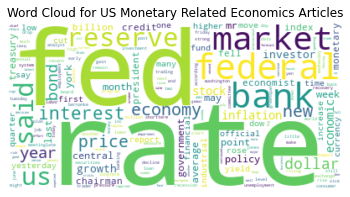

In [56]:
# Write the code to answer the question above
from wordcloud import WordCloud
monetarywords = [word for tokenlist in df_monetarynews['tokens'].tolist() for word in tokenlist]
monetarywords = ' '.join(monetarywords)
monetary_word_cloud = WordCloud(collocations=False, background_color='white').generate(monetarywords)
plt.imshow(monetary_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Monetary Related Economics Articles')
plt.show()

#### 7b.ii. What is the word cloud for df_nonmonetarynews?


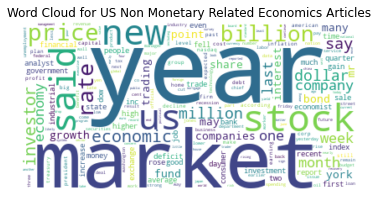

In [55]:
# Write the code to answer the question above
nonmonetarywords = [word for tokenlist in df_nonmonetarynews['tokens'].tolist() for word in tokenlist]
nonmonetarywords  = ' '.join(nonmonetarywords)
word_cloud = WordCloud(collocations=False, background_color='white').generate(nonmonetarywords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for US Non Monetary Related Economics Articles')
plt.show()

#### 7b.iii. What differences do you notice? Do these differences seem consistent with your list of top 15 most common words?

Answer: The biggest words are different - the fed and banks are mentioned more in the first, and the market and stocks are mentioned more in the second. These differences are consistent.


### 8. Monetary Uncertainty in the News: 

Loughran and McDonald (2011) have created a commonly used bank of word-sentiment lists. One list is a list of “uncertainty words.” You can find this dataset in the Github HW1 Repository. 

The following is code to make a Monetary Uncertain Score from df_monetarynews and to plot the figure over time. However, there are three things wrong with in the code.

#### 8a. Identify the typos, run the correct code, and insert the graph below. 

HINT: Run the code line by line and manually view the objects that were created and/or the error codes that appear.

Answer: The three typos are...
- uncertainty_score.append(u_tally) - this should be within the for loop (appending at each row)
- df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).average() - there is no 'average', should use mean function
- plt.plot(df_monetarynews_yearly['year'],df_monetarynews['text_uncertainty_score']) - using two different dfs with different dimensions 


C:\Users\Nadya\AppData\Local\Temp\ipykernel_7500\1471380284.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['text_uncertainty_score'] = uncertainty_score
C:\Users\Nadya\AppData\Local\Temp\ipykernel_7500\1471380284.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetarynews['year'] = df_monetarynews['date'].dt.year.astype(str)


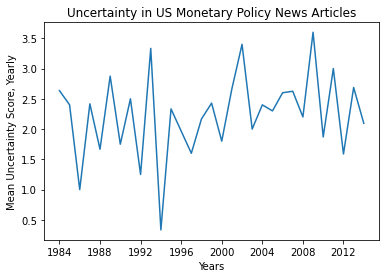

In [50]:
folder_path = 'C:/Users/Nadya/IdeaProjects/ECON1680/ECON1620-Spring2024'

# Word Lists
uncertainty_wordlist_LM = pd.read_csv(os.path.join(folder_path,"LM_Uncertainty.csv"), encoding='utf-8')
uncertainty_wordlist_LM = uncertainty_wordlist_LM['uncertain words'].tolist()

# Text Uncertainty Score for Each Article
uncertainty_score = []
for row in df_monetarynews['tokens']:
    u_tally = 0
    for word in uncertainty_wordlist_LM:
        if word in row:
            u_tally += 1
    uncertainty_score.append(u_tally)

df_monetarynews['text_uncertainty_score'] = uncertainty_score   
    
# Plot Yearly Mean Monetary Policy Uncertainty Over Time

#Take mean over years
df_monetarynews['year'] = df_monetarynews['date'].dt.year.astype(str)
df_monetarynews_yearly = df_monetarynews.groupby(by=['year']).mean(numeric_only=True)

df_monetarynews_yearly['year'] = pd.to_datetime(df_monetarynews_yearly.index)

#Plot time Series
plt.plot(df_monetarynews_yearly['year'],df_monetarynews_yearly['text_uncertainty_score'])
plt.xlabel('Years')
plt.ylabel('Mean Uncertainty Score, Yearly')
plt.title('Uncertainty in US Monetary Policy News Articles')
plt.show()